# Step 1 - Importing libraries and CSV files

In [1]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import pandas as pd

**This CSV file contains information on 1 million flights that occurred between April and August 2022.**

In [2]:

try:
    df = pd.read_csv("downloaded_file.csv")
    display(df)

except:
    
    file_id = '1HZUl8G9vkjTzYCQ43sOsMEIy-MP6k4v8'

    url = f'https://drive.google.com/uc?id={file_id}'

    output_path = 'downloaded_file.csv'  # Cambia la extensión si no es un CSV

    gdown.download(url, output_path, quiet=False)

    df = pd.read_csv(output_path)

    df

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1290.0,USD,1347000.0,1320000.0,2%,2022-04-29 17:52:59
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,1540,2,1347.0,USD,1381000.0,1320000.0,4%,2022-04-29 17:52:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998861,BOM,India,SYD,Australia,Boeing 777|Airbus A380,EK,[Emirates],EK503|EK503,2022-05-01 19:20:00,2022-05-02 22:05:00,1335,1,1317.0,USD,1567000.0,1133000.0,38%,2022-04-29 17:52:59
998862,BOM,India,SYD,Australia,Boeing 777|Airbus A380,EK,[Emirates],EK509|EK509,2022-05-01 22:20:00,2022-05-02 22:05:00,1155,1,1317.0,USD,1583000.0,1133000.0,39%,2022-04-29 17:52:59
998863,BOM,India,SYD,Australia,Airbus A350|Boeing 787|Boeing 737,multi,[Etihad| Virgin Australia],EY205|EY205|EY205,2022-05-01 04:35:00,2022-05-02 09:55:00,1490,2,1328.0,USD,1354000.0,1133000.0,19%,2022-04-29 17:52:59
998864,BOM,India,SYD,Australia,Airbus A321 (Sharklets)|Airbus A321|Airbus A330,multi,[Air India| SriLankan],AI603|AI603|AI603,2022-05-01 06:10:00,2022-05-02 14:55:00,1695,2,1368.0,USD,1099000.0,1133000.0,-2%,2022-04-29 17:52:59


**This CSV document entitled 'Airport Code Dataframe' lists airport codes and their corresponding cities.**

In [3]:
try:
    df_airport_codes = pd.read_csv("city-mappings.csv")
    display(df_airport_codes)

except:
    
    file_id = '11sqbXlS21wFF4fsxtfurReCvOncVDIpW'

    url = f'https://drive.google.com/uc?id={file_id}'

    output_path = 'city-mappings-csv'  # Cambia la extensión si no es un CSV

    gdown.download(url, output_path, quiet=False)

    df_airport_codes = pd.read_csv(output_path)

    df_airport_codes

  

,index,Airport Name,City,Country,three-digit code,four_digit,l1,l2
0,0,Forestville Airport,Forestville,Canada,NaN,CYFE,48.746101,-69.097198
1,1,Pitt Meadows Airport,Pitt Meadows,Canada,NaN,CYPK,49.216099,-122.709999
2,2,Blida Airport,Blida,Algeria,NaN,DAAB,36.503601,2.814170
3,3,Bou Saada Airport,Bou Saada,Algeria,NaN,DAAD,35.332500,4.206390
4,4,Reggane Airport,Reggan,Algeria,NaN,DAAN,26.710100,0.285647
...,...,...,...,...,...,...,...,...
7179,7179,Zunyi Xinzhou Airport,Zunyi,China,ZYI,ZUZY,27.589500,107.000700
7180,7180,Osmany International Airport,Sylhet Osmani,Bangladesh,ZYL,VGSY,24.963200,91.866798
7181,7181,Mzuzu Airport,Mzuzu,Malawi,ZZU,FWUU,-11.444700,34.011799
7182,7182,Zanesville Municipal Airport,Zanesville,United States,ZZV,KZZV,39.944401,-81.892097


# Step 2 - Merging the two data frames

**2.1 Merging the columns 'city' and 'three-digit code' from the Airport Codes Dataframe into the main dataframe. All other columns will be dropped.**

In [4]:
df_airport_codes.drop(columns=["index","Airport Name", "four_digit", "l1", "l2", "Country"], inplace=True)
df_airport_codes

,City,three-digit code
0,Forestville,NaN
1,Pitt Meadows,NaN
2,Blida,NaN
3,Bou Saada,NaN
4,Reggan,NaN
...,...,...
7179,Zunyi,ZYI
7180,Sylhet Osmani,ZYL
7181,Mzuzu,ZZU
7182,Zanesville,ZZV


**2.2 Merging the two dataframes to display the city corresponding to each airport code.**

In [5]:

# Rename columns in df_airport_codes for city_of_departure
df_airport_codes_departure = df_airport_codes.rename(columns={'three-digit code': 'from_airport_code', 'City': 'city_of_departure'})

# Perform the merge to add city_of_departure
df = pd.merge(df, df_airport_codes_departure[['from_airport_code', 'city_of_departure']], on='from_airport_code', how='left')

# Rename columns in df_airport_codes for city_of_arrival
df_airport_codes_arrival = df_airport_codes.rename(columns={'three-digit code': 'dest_airport_code', 'City': 'city_of_arrival'})

# Perform the merge to add city_of_arrival
df = pd.merge(df, df_airport_codes_arrival[['dest_airport_code', 'city_of_arrival']], on='dest_airport_code', how='left')

# Reorder the columns to place city_of_departure and city_of_arrival next to their respective airport codes
cols = df.columns.tolist()
from_idx = cols.index('from_airport_code') + 1
to_idx = cols.index('dest_airport_code') + 1

cols.insert(from_idx, cols.pop(cols.index('city_of_departure')))
cols.insert(to_idx, cols.pop(cols.index('city_of_arrival')))

df = df[cols]




# Step 3 - Cleaning the data

**3.1 The first step is to drop all rows (flights) that include layovers. This crucial step prevents any distortions in the analysis of flight duration, as time spent during layovers prevents an accurate assessment of actual flying time. Moreover, when layovers are involved, the table only shows the aircraft used without specifying the distance each aircraft traveled. This lack of detailed information makes it very difficult to accurately determine the pollution levels of each type of aircraft. By excluding layovers, we ensure that we can more easily and precisely analyze the emissions and performance of individual aircraft types.**

In [6]:
df = df[df.stops == 0]

**3.2 Renaming the duration column to indicate it is measured in minutes.**

In [7]:
df.rename(columns= {'duration': 'duration_minutes'}, inplace = True)

**3.3 Eliminating all rows that do not provide information about CO2 emissions, as this data is crucial for the analysis.**

In [8]:
df.dropna(subset= "co2_emissions", inplace=True)
df.isnull().sum()

from_airport_code                     0
city_of_departure                     0
from_country                          0
city_of_arrival                     214
dest_airport_code                     0
dest_country                          0
aircraft_type                       224
airline_number                        0
airline_name                          0
flight_number                         0
departure_time                        0
arrival_time                          0
duration_minutes                      0
stops                                 0
price                               847
currency                              0
co2_emissions                         0
avg_co2_emission_for_this_route    2978
co2_percentage                     2978
scan_date                             0
dtype: int64

**3.4 Filling null values in avg_co2_emission_for_this_route and co2_percentage.**

In [9]:
# Step 1: Identify routes with null values in 'avg_co2_emission_for_this_route'
routes_with_null_avg_co2 = df[df['avg_co2_emission_for_this_route'].isnull()]

# Step 2: Calculate the average CO2 emissions for these routes
route_avg_co2 = routes_with_null_avg_co2.groupby(['from_airport_code', 'dest_airport_code'])['co2_emissions'].mean().reset_index()

# Rename the 'co2_emissions' column to 'avg_co2_emission_for_this_route' for direct use
route_avg_co2.rename(columns={'co2_emissions': 'avg_co2_emission_for_this_route_new'}, inplace=True)

# Step 3: Merge the route averages back into the original DataFrame (df)
df = pd.merge(df, route_avg_co2, on=['from_airport_code', 'dest_airport_code'], how='left')

# Step 4: Fill the null values in 'avg_co2_emission_for_this_route' with the calculated route averages
df['avg_co2_emission_for_this_route'].fillna(df['avg_co2_emission_for_this_route_new'], inplace=True)

# Step 5: Recalculate the CO2 percentage based on the filled average CO2 emissions
df['co2_percentage'] = (df['co2_emissions'] - df['avg_co2_emission_for_this_route']) / df['avg_co2_emission_for_this_route'] * 100

# Drop the temporary 'avg_co2_emission_for_this_route_new' column as it is no longer needed
df.drop(columns=['avg_co2_emission_for_this_route_new'], inplace=True)

df


C:\Users\dalre\AppData\Local\Temp\ipykernel_9884\3350462465.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_co2_emission_for_this_route'].fillna(df['avg_co2_emission_for_this_route_new'], inplace=True)


,from_airport_code,city_of_departure,from_country,city_of_arrival,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration_minutes,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algier,Algeria,Cairo,CAI,Egypt,Boeing 737,MS,[EgyptAir],MS846,2022-05-29 12:55:00,2022-05-29 17:30:00,215,0,350.0,USD,327000.0,454000.0,-27.973568,2022-04-29 17:52:59
1,ALG,Algier,Algeria,Paris,CDG,France,Boeing 737,5O,[ASL Airlines],5O162,2022-04-30 10:20:00,2022-04-30 13:40:00,140,0,97.0,USD,210000.0,186000.0,12.903226,2022-04-29 17:52:59
2,ALG,Algier,Algeria,Cairo,CAI,Egypt,Boeing 737,MS,[EgyptAir],MS846,2022-07-28 12:55:00,2022-07-28 17:30:00,215,0,350.0,USD,327000.0,454000.0,-27.973568,2022-04-29 17:52:59
3,ALG,Algier,Algeria,Paris,CDG,France,Boeing 737,5O,[ASL Airlines],5O162,2022-05-02 10:20:00,2022-05-02 13:40:00,140,0,202.0,USD,186000.0,186000.0,0.000000,2022-04-29 17:52:59
4,ALG,Algier,Algeria,Paris,CDG,France,Boeing 737,5O,[ASL Airlines],5O272,2022-05-02 17:00:00,2022-05-02 20:20:00,140,0,230.0,USD,186000.0,186000.0,0.000000,2022-04-29 17:52:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228,BOM,Mumbai,India,Bangkok,BKK,Thailand,Airbus A350,TG,[THAI],TG318,2022-05-01 23:35:00,2022-05-02 05:35:00,270,0,221.0,USD,263000.0,340000.0,-22.647059,2022-04-29 17:52:59
16229,BOM,Mumbai,India,Bangkok,BKK,Thailand,Airbus A320,G8,[GO FIRST],G825,2022-05-03 05:50:00,2022-05-03 12:00:00,280,0,110.0,USD,300000.0,340000.0,-11.764706,2022-04-29 17:52:59
16230,BOM,Mumbai,India,Bangkok,BKK,Thailand,Boeing 777,TG,[THAI],TG318,2022-05-03 23:35:00,2022-05-04 05:35:00,270,0,191.0,USD,373000.0,340000.0,9.705882,2022-04-29 17:52:59
16231,BOM,Mumbai,India,Bangkok,BKK,Thailand,Airbus A320,G8,[GO FIRST],G825,2022-05-07 05:50:00,2022-05-07 12:00:00,280,0,145.0,USD,300000.0,340000.0,-11.764706,2022-04-29 17:52:59


**3.5 The Airport Code dataframe did not include the airport code for Doha (DOH), so we inserted it manually. This is straightforward because the only null values in the city of arrival column pertain to Doha (DOH).**

In [10]:
df.city_of_arrival.fillna("Doha", inplace=True)

C:\Users\dalre\AppData\Local\Temp\ipykernel_9884\3493863224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.city_of_arrival.fillna("Doha", inplace=True)


1. Most Pollutant Routes in Summer 2022
Analysis: Calculate the total CO2 emissions for each route.
Approach: Sum CO2 emissions for all flights on each route, then rank them to find the most polluting routes.

In [11]:
# Group by route and sum CO2 emissions
pollutant_routes = df.groupby(['city_of_departure', 'city_of_arrival'])['co2_emissions'].sum().reset_index()
# Sort by CO2 emissions in descending order
pollutant_routes = pollutant_routes.sort_values(by='co2_emissions', ascending=False)
# Display the top 20 most pollutant routes
top_pollutant_routes = pollutant_routes.head(20)
top_pollutant_routes

,city_of_departure,city_of_arrival,co2_emissions
341,Mumbai,Delhi,51553000.0
205,Delhi,Mumbai,51475000.0
336,Melbourne,Sydney,47924000.0
194,Delhi,Bangalore,47835000.0
512,Sydney,Melbourne,47484000.0
78,Bogota,Madrid,42822000.0
483,Shanghai,Shenzhen,35626000.0
413,Paris,New York,35385000.0
515,Sydney,Singapore,33654000.0
478,Shanghai,Guangzhou,31306000.0


In [12]:
# Create a bar graph using Plotly
fig = px.bar(top_pollutant_routes, 
             x='co2_emissions', 
             y='city_of_departure', 
             color='city_of_arrival', 
             orientation='h', 
             title='Top 20 Most Pollutant Routes by CO2 Emissions',
             labels={'co2_emissions': 'CO2 Emissions (kg)', 'city_of_departure': 'City of Departure'},
             height=600)

# Show the plot
fig.show()

2. Most Polluting Aircraft Types
Analysis: Determine CO2 emissions by aircraft type.
Approach: Aggregate CO2 emissions by aircraft type and identify which types have the highest emissions.

In [13]:
polluting_aircraft = df.groupby('aircraft_type')['co2_emissions'].sum().reset_index()
# Sort by CO2 emissions
most_polluting_aircraft = polluting_aircraft.sort_values(by='co2_emissions', ascending=False)
display(most_polluting_aircraft.head(20))

,aircraft_type,co2_emissions
22,Boeing 777,643467000.0
23,Boeing 787,614378000.0
5,Airbus A320,561207000.0
16,Boeing 737,468573000.0
10,Airbus A330,302245000.0
7,Airbus A321,270180000.0
13,Airbus A350,254449000.0
4,Airbus A319,134919000.0
14,Airbus A380,122657000.0
9,Airbus A321neo,110204000.0


In [14]:
# Create the bar plot using Plotly
fig = px.bar(most_polluting_aircraft.head(20), x='aircraft_type', y='co2_emissions',
             title='Top 20 Most Polluting Aircraft Types by Total CO2 Emissions',
             labels={'aircraft_type': 'Aircraft Type', 'co2_emissions': 'Total CO2 Emissions'},
             color='co2_emissions', color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    xaxis_title='Aircraft Type',
    yaxis_title='Total CO2 Emissions',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

3. Correlation Between Ticket Price and CO2 Emissions
Analysis: Explore the relationship between ticket price and CO2 emissions per flight.
Approach: Calculate the correlation coefficient between ticket price and CO2 emissions.

In [15]:
correlation_price_co2 = df['price'].corr(df['co2_emissions'])
print(f"Correlation between ticket price and CO2 emissions: {correlation_price_co2}")

Correlation between ticket price and CO2 emissions: 0.7541483326363869


In [16]:
# Create a scatter plot with Plotly
fig = px.scatter(df, x='price', y='co2_emissions', 
                 title='Scatter Plot: Ticket Price vs CO2 Emissions',
                 labels={'price': 'Ticket Price', 'co2_emissions': 'CO2 Emissions'},
                 trendline='ols',  # Add a trendline (OLS regression)
                 color='co2_emissions', color_continuous_scale='Viridis',  # Color points based on CO2 emissions
                 hover_name=df.index)  # Show index as hover name

# Customize the layout
fig.update_layout(
    xaxis_title='Ticket Price',
    yaxis_title='CO2 Emissions',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

4. Most Popular Routes
Analysis: Identify routes with the highest number of flights.
Approach: Count the number of flights for each route and rank them.

In [17]:
popular_routes = df.groupby(['from_airport_code', 'dest_airport_code']).size().reset_index(name='num_flights')
# Sort by number of flights
most_popular_routes = popular_routes.sort_values(by='num_flights', ascending=False)
display(most_popular_routes.head(10))

,from_airport_code,dest_airport_code,num_flights
429,MEL,SYD,488
533,SYD,MEL,485
82,BOM,DEL,364
275,DEL,BOM,364
274,DEL,BLR,252
520,SHA,PEK,177
521,SHA,SZX,175
415,HGH,SZX,167
516,SHA,CAN,165
407,HGH,CAN,157


In [18]:
# Create a bar plot using Plotly
fig = px.bar(most_popular_routes, x='from_airport_code', y='num_flights', 
             title='Top 10 Most Popular Routes by Number of Flights',
             labels={'from_airport_code': 'From Airport', 'num_flights': 'Number of Flights'},
             color='num_flights', color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    xaxis_title='From Airport',
    yaxis_title='Number of Flights',
    title_x=0.5  # Center the title
)

5. Shortest and Longest Routes
Analysis: Find the routes with the minimum and maximum distances.
Approach: Use the distance data to identify the shortest and longest routes.

In [19]:
shortest_routes = df.sort_values(by='duration_minutes').head()
longest_routes = df.sort_values(by='duration_minutes', ascending=False).head()
display("Shortest Routes:", shortest_routes)
display("Longest Routes:", longest_routes)

'Shortest Routes:'

,from_airport_code,city_of_departure,from_country,city_of_arrival,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration_minutes,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
13503,FRA,Frankfurt,Germany,Zurich,ZRH,Zurich,Airbus A320,LH,[Lufthansa],LH1196,2022-08-28 16:25:00,2022-08-28 17:20:00,55,0,155.0,USD,55000.0,65000.0,-15.384615,2022-04-29 17:52:59
9605,DUB,Dublin,Dublin,Manchester,MAN,United Kingdom,Boeing 737MAX 8 Passenger,FR,[Ryanair],FR1556,2022-05-30 17:15:00,2022-05-30 18:10:00,55,0,14.0,USD,46000.0,53000.0,-13.207547,2022-04-29 17:52:59
9604,DUB,Dublin,Dublin,Manchester,MAN,United Kingdom,Boeing 737,FR,[Ryanair],FR562,2022-05-30 13:50:00,2022-05-30 14:45:00,55,0,14.0,USD,53000.0,53000.0,0.000000,2022-04-29 17:52:59
12407,FRA,Frankfurt,Germany,Brussels,BRU,Belgium,Airbus A321,LH,[Lufthansa],LH1016,2022-07-29 16:25:00,2022-07-29 17:20:00,55,0,88.0,USD,61000.0,61000.0,0.000000,2022-04-29 17:52:59
12726,FRA,Frankfurt,Germany,Munich,MUC,Germany,Airbus A321,LH,[Lufthansa],LH98,2022-05-15 09:15:00,2022-05-15 10:10:00,55,0,106.0,USD,60000.0,60000.0,0.000000,2022-04-29 17:52:59


'Longest Routes:'

,from_airport_code,city_of_departure,from_country,city_of_arrival,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration_minutes,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
16210,DEL,Delhi,India,Chicago,ORD,United States,Boeing 787,UA,[United],UA713,2022-05-07 01:55:00,2022-05-07 08:40:00,1035,0,1836.0,USD,1062000.0,1324000.0,-19.788520,2022-04-29 17:52:59
16218,DEL,Delhi,India,Chicago,ORD,United States,Boeing 787,UA,[United],UA713,2022-08-28 01:55:00,2022-08-28 08:40:00,1035,0,1374.0,USD,1022000.0,1324000.0,-22.809668,2022-04-29 17:52:59
16214,DEL,Delhi,India,Chicago,ORD,United States,Boeing 787,UA,[United],UA713,2022-05-30 01:55:00,2022-05-30 08:40:00,1035,0,1278.0,USD,1062000.0,1324000.0,-19.788520,2022-04-29 17:52:59
16216,DEL,Delhi,India,Chicago,ORD,United States,Boeing 787,UA,[United],UA713,2022-07-29 01:55:00,2022-07-29 08:40:00,1035,0,1836.0,USD,1022000.0,1324000.0,-22.809668,2022-04-29 17:52:59
16207,DEL,Delhi,India,Chicago,ORD,United States,Boeing 787,UA,[United],UA713,2022-05-01 01:55:00,2022-05-01 08:40:00,1035,0,1374.0,USD,1062000.0,1324000.0,-19.788520,2022-04-29 17:52:59


In [20]:
# Create a bar plot using Plotly
fig = px.bar(df, x='from_airport_code', y='duration_minutes', 
             title='Shortest and Longest Routes by Duration',
             labels={'from_airport_code': 'From Airport', 'duration_minutes': 'Duration (minutes)'},
             color='from_airport_code',  # Color bars by 'from_airport_code'
             barmode='group')  # Group bars by 'from_airport_code'

# Customize the layout
fig.update_layout(
    xaxis_title='From Airport',
    yaxis_title='Duration (minutes)',
    title_x=0.5,  # Center the title
    bargap=0.2  # Gap between bars
)

# Show the plot
fig.show()

6. Correlation Between Price and Distance
Analysis: Examine how ticket prices vary with distance.
Approach: Calculate the correlation coefficient between ticket price and distance traveled.

In [21]:
correlation_price_stops = df['price'].corr(df['duration_minutes'])
print(f"Correlation between ticket price and time travelled: {correlation_price_stops}")

Correlation between ticket price and time travelled: 0.7111856736829587


In [22]:
# Create a scatter plot using Plotly
fig = px.scatter(df, x='duration_minutes', y='price', 
                 title='Correlation between Ticket Price and Travel Duration',
                 labels={'duration_minutes': 'Duration (minutes)', 'price': 'Ticket Price'},
                 trendline='ols',  # Add OLS regression trendline
                 color='price',  # Color points by 'price'
                 color_continuous_scale='Viridis')  # Set color scale

# Customize the layout
fig.update_layout(
    xaxis_title='Duration (minutes)',
    yaxis_title='Ticket Price',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

9. CO2 Emissions by Airline Analysis: Compare the CO2 emissions of different airlines. Approach: Aggregate CO2 emissions data by airline and analyze their relative environmental impact.

In [23]:
# Aggregate CO2 emissions by airline
aggregated_data = df.groupby('airline_name')['co2_emissions'].sum().reset_index()

# Sort airlines based on total emissions (optional)
aggregated_data = aggregated_data.sort_values(by='co2_emissions', ascending=False)

# Display aggregated data
print(aggregated_data)

           airline_name  co2_emissions
62          [Lufthansa]    379861000.0
13         [Air France]    292242000.0
9          [Air Canada]    197230000.0
14          [Air India]    144710000.0
34     [China Southern]    142771000.0
..                  ...            ...
103           [Vueling]       616000.0
45   [Garuda Indonesia]       571000.0
66           [Nile Air]       554000.0
87              [Swoop]       260000.0
94        [Uni Airways]       214000.0

[113 rows x 2 columns]


In [24]:

# Create a bar chart using Plotly Express
fig = px.bar(aggregated_data, x='airline_name', y='co2_emissions', 
             title='CO2 Emissions by Airline',
             labels={'Airline': 'Airline', 'CO2_Emissions': 'Total CO2 Emissions'})

# Customize layout
fig.update_layout(xaxis_title='Airline', yaxis_title='Total CO2 Emissions')

# Show the plot
fig.show()

10. CO2 Emissions by Airport

Analysis: Assess the total CO2 emissions associated with each airport.
Approach: Sum the CO2 emissions for all departures and arrivals at each airport.

In [25]:
# Create separate dataframes for departures and arrivals with an indicator column
departures = df[['from_airport_code', 'co2_emissions']].copy()
departures['type'] = 'departure'
departures.columns = ['airport', 'co2_emissions', 'type']
arrivals = df[['dest_airport_code', 'co2_emissions']].copy()
arrivals['type'] = 'arrival'
arrivals.columns = ['airport', 'co2_emissions', 'type']

# Concatenate the departures and arrivals dataframes
combined_data = pd.concat([departures, arrivals])
# Create a pivot table to sum CO2 emissions for each airport
pivot_table = pd.pivot_table(combined_data, values='co2_emissions', index='airport', aggfunc='sum').reset_index()
# Sort by total CO2 emissions
pivot_table = pivot_table.sort_values(by='co2_emissions', ascending=False)
# Sort by total CO2 emissions and select top 10 airports
top_airports = pivot_table.nlargest(15, 'co2_emissions')


C:\Users\dalre\AppData\Local\Temp\ipykernel_9884\2405683561.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




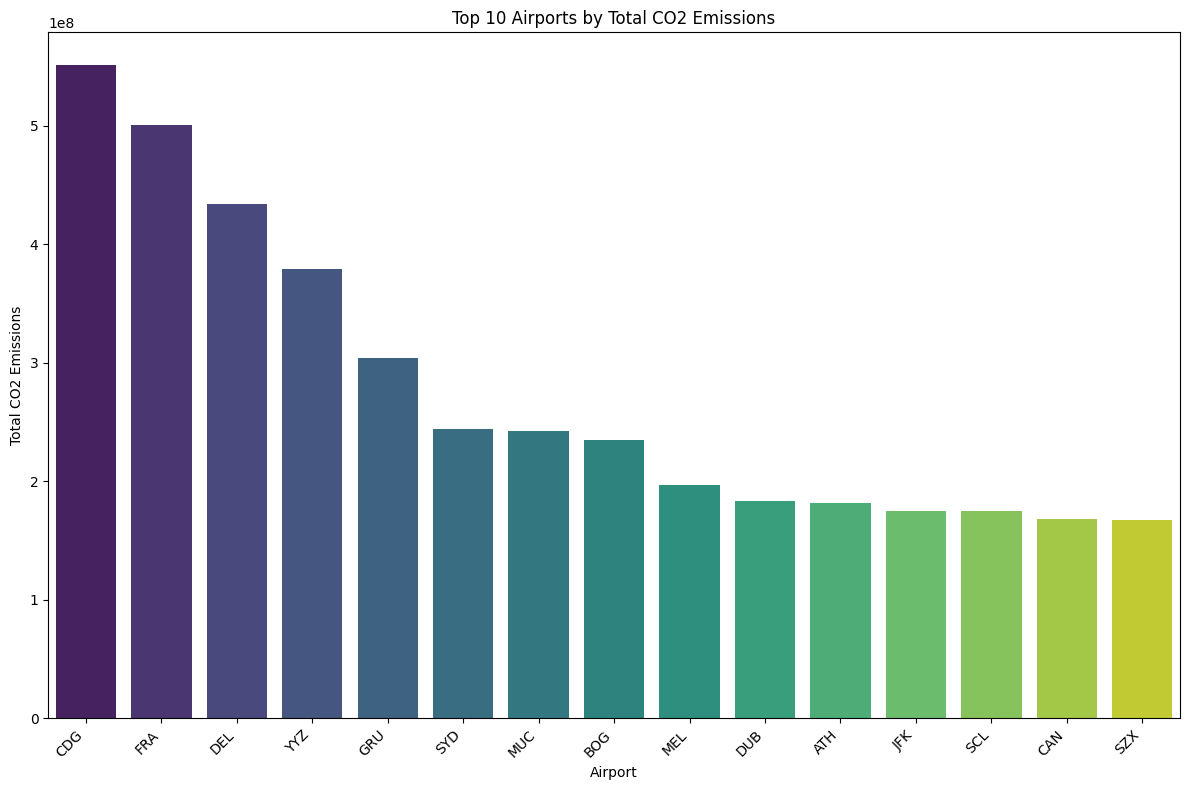

In [26]:
# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='airport', y='co2_emissions', data=top_airports, palette='viridis')

# Customize the plot
plt.title('Top 10 Airports by Total CO2 Emissions')
plt.xlabel('Airport')
plt.ylabel('Total CO2 Emissions')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [27]:
import plotly.express as px
fig = px.bar(pivot_table.head(15), x='airport', y='co2_emissions', 
             title='Top 10 Airports by Total CO2 Emissions',
             labels={'co2_emissions': 'Total CO2 Emissions', 'airport': 'Airport'},
             text='co2_emissions',
             color='co2_emissions')
# Customize the chart layout
fig.update_layout(
    title='Top 10 Airports by Total CO2 Emissions',
    xaxis_title='Airport',
    yaxis_title='Total CO2 Emissions',
    uniformtext_minsize=8, uniformtext_mode='hide'
)
# Display the bar chart
fig.show()

8. Fuel Consumption by Plane Type
Additional Data Required: Find a dataset that provides fuel consumption rates for different aircraft types.
Analysis: Combine fuel consumption data with distance traveled to calculate fuel efficiency and emissions.
Approach: Use the additional fuel consumption data to calculate the fuel consumption for each flight based on its aircraft type and distance, then analyze the results.



In [28]:
url = "https://en.wikipedia.org/wiki/Fuel_economy_in_aircraft"
response = requests.get(url)
if response.status_code == 200:
    page_content = response.content
else:
    raise Exception(f"Failed to retrieve content. Status code: {response.status_code}")


In [29]:
soup = BeautifulSoup(page_content, 'html.parser')

In [30]:
# Wikipedia tables often have the class "wikitable"
table = soup.find('table', {'class': 'wikitable'})


In [31]:
# Find all tables with class "wikitable"
tables = soup.find_all('table', {'class': 'wikitable'})

In [32]:
# # Create an empty list to store the rows
# rows = []

# # Extract table rows
# for row in table.find_all('tr'):
#     cells = row.find_all(['td', 'th'])
#     cell_text = [cell.get_text(strip=True) for cell in cells]
#     rows.append(cell_text)

# # Create a DataFrame from the extracted data
# fuel_consumption_df = pd.DataFrame(rows)

# # Display the first few rows of the DataFrame
# display(fuel_consumption_df)
# print(fuel_consumption_df.columns)

In [33]:
# Check the first few rows of each table to identify the correct ones
for idx, table in enumerate(tables):
    rows = table.find_all('tr')
    print(f"Table index: {idx}")
    for row in rows[:2]:  # Print the first 2 rows
        print([cell.get_text(strip=True) for cell in row.find_all(['td', 'th'])])
    print("\n")

Table index: 0
['Model', 'First flight', 'Seats', 'Fuel burn', 'Fuel per seat']
['Antonov An-148(241 nmi)', '2004', '89', '4.23\xa0kg/km (15.0\xa0lb/mi)', '5.95\xa0L/100\xa0km (39.5\xa0mpg‑US)[55]']


Table index: 1
['Model', 'First flight', 'Seats', 'Sector', 'Fuel burn', 'Fuel efficiency per seat']
['Airbus A220100', '2013', '115', '600\xa0nmi (1,100\xa0km)', '2.8\xa0kg/km (10.1\xa0lb/mi)', '3.07\xa0L/100\xa0km (76.7\xa0mpg‑US)[68]']


Table index: 2
['Model', 'First flight', 'Seats', 'Fuel Burn', 'Fuel efficiency per seat']
['Airbus A220-100', '2013', '125', '2.28\xa0kg/km (8.1\xa0lb/mi)', '2.28\xa0L/100\xa0km (103\xa0mpg‑US)[69]']


Table index: 3
['Model', 'First flight', 'Seats', 'Sector', 'Fuel burn', 'Fuel per seat']
['Airbus A220-300', '2015', '150', '2,000\xa0nmi (3,700\xa0km)', '2.42\xa0kg/km (8.59\xa0lb/mi)', '2.02\xa0L/100\xa0km (116\xa0mpg‑US)[70]']


Table index: 4
['Model', 'First flight', 'Seats', 'Sector', 'Fuel burn', 'Fuel per seat']
['Airbus A330-200', '1997', '241

In [34]:
# After identifying the tables, we assume their indices are as follows:
# 0: Short Haul Flights
# 1: Medium Haul Flights
# 2: Long Haul Flights
# 3: Regional Flights
short_haul_index = 0
medium_haul_index = 1
long_haul_index = 2
regional_flights_index = 3

def extract_table_data(table):
    rows = []
    for row in table.find_all('tr'):
        cells = row.find_all(['td', 'th'])
        cell_text = [cell.get_text(strip=True) for cell in cells]
        rows.append(cell_text)
    return pd.DataFrame(rows)

In [35]:
# Extract data from each table
short_haul_df = extract_table_data(tables[short_haul_index])
medium_haul_df = extract_table_data(tables[medium_haul_index])
long_haul_df = extract_table_data(tables[long_haul_index])
regional_flights_df = extract_table_data(tables[regional_flights_index])

# Assume the first row is the header for each table
short_haul_df.columns = short_haul_df.iloc[0]
short_haul_df = short_haul_df.drop(0).reset_index(drop=True)

medium_haul_df.columns = medium_haul_df.iloc[0]
medium_haul_df = medium_haul_df.drop(0).reset_index(drop=True)

long_haul_df.columns = long_haul_df.iloc[0]
long_haul_df = long_haul_df.drop(0).reset_index(drop=True)

regional_flights_df.columns = regional_flights_df.iloc[0]
regional_flights_df = regional_flights_df.drop(0).reset_index(drop=True)

# Display the DataFrames
print("Short Haul Flights:")
display(short_haul_df.head())

print("\nMedium Haul Flights:")
display(medium_haul_df.head())

print("\nLong Haul Flights:")
display(long_haul_df.head())

print("\nRegional Flights:")
display(regional_flights_df.head())


Short Haul Flights:


,Model,First flight,Seats,Fuel burn,Fuel per seat
0,Antonov An-148(241 nmi),2004,89,4.23 kg/km (15.0 lb/mi),5.95 L/100 km (39.5 mpg‑US)[55]
1,Antonov An-158(241 nmi),2010,99,4.34 kg/km (15.4 lb/mi),5.47 L/100 km (43.0 mpg‑US)[55]
2,ATR 42-500,1995,48,1.26 kg/km (4.5 lb/mi),3.15 L/100 km (75 mpg‑US)[56]
3,ATR 72-500,1997,72,1.67 kg/km (5.9 lb/mi),2.89 L/100 km (81 mpg‑US)[56]
4,ATR 72-500,1997,70,1.42 kg/km (5.0 lb/mi),2.53 L/100 km (93 mpg‑US)[57]



Medium Haul Flights:


,Model,First flight,Seats,Sector,Fuel burn,Fuel efficiency per seat
0,Airbus A220100,2013,115,"600 nmi (1,100 km)",2.8 kg/km (10.1 lb/mi),3.07 L/100 km (76.7 mpg‑US)[68]
1,Airbus A220300,2015,140,"600 nmi (1,100 km)",3.10 kg/km (11.01 lb/mi),2.75 L/100 km (85.6 mpg‑US)[68]
2,Airbus A220-100,2013,125,500 nmi (930 km),2.57 kg/km (9.1 lb/mi),2.57 L/100 km (92 mpg‑US)[69]
3,Airbus A220-300,2015,160,500 nmi (930 km),2.85 kg/km (10.11 lb/mi),2.23 L/100 km (105 mpg‑US)[70]
4,Airbus A319neo,2015,144,"600 nmi (1,100 km)",3.37 kg/km (11.94 lb/mi),2.92 L/100 km (80.6 mpg‑US)[68]



Long Haul Flights:


,Model,First flight,Seats,Fuel Burn,Fuel efficiency per seat
0,Airbus A220-100,2013,125,2.28 kg/km (8.1 lb/mi),2.28 L/100 km (103 mpg‑US)[69]
1,Airbus A220-300,2015,135,2.30 kg/km (8.17 lb/mi),2.13 L/100 km (110 mpg‑US)[45]
2,Airbus A220-300,2015,150,2.42 kg/km (8.6 lb/mi),2.02 L/100 km (116 mpg‑US)[86]
3,Airbus A220-300,2015,160,2.56 kg/km (9.08 lb/mi),2.00 L/100 km (118 mpg‑US)[70]
4,Airbus A319,1995,124,2.93 kg/km (10.4 lb/mi),2.95 L/100 km (80 mpg‑US)[87]



Regional Flights:


,Model,First flight,Seats,Sector,Fuel burn,Fuel per seat
0,Airbus A220-300,2015,150,"2,000 nmi (3,700 km)",2.42 kg/km (8.59 lb/mi),2.02 L/100 km (116 mpg‑US)[70]
1,Airbus A320,1987,150,"2,151 nmi (3,984 km)",2.91 kg/km (10.3 lb/mi),2.43 L/100 km (97 mpg‑US)[96]
2,Airbus A321LR,2016,154,"3,400 nmi (6,300 km)",2.99 kg/km (10.6 lb/mi),2.43 L/100 km (97 mpg‑US)[97]
3,Airbus A330-200,1997,241,"3,000 nmi (5,600 km)",6 kg/km (21 lb/mi),3.11 L/100 km (76 mpg‑US)[98]
4,Airbus A330-300,1992,262,"3,000 nmi (5,600 km)",6.25 kg/km (22.2 lb/mi),2.98 L/100 km (79 mpg‑US)[98]


In [36]:
# Drop specific columns from each DataFrame
short_haul_df.drop(columns=["First flight", "Seats", "Fuel per seat"], inplace=True)
medium_haul_df.drop(columns=["First flight", "Seats", "Sector","Fuel efficiency per seat"], inplace=True)
long_haul_df.drop(columns=["First flight", "Seats", "Fuel efficiency per seat"], inplace=True)
regional_flights_df.drop(columns=["First flight", "Seats", "Sector", "Fuel per seat"], inplace=True)

# Display the DataFrames
print("Short Haul Flights:")
display(short_haul_df.head())

print("\nMedium Haul Flights:")
display(medium_haul_df.head())

print("\nLong Haul Flights:")
display(long_haul_df.head())

print("\nRegional Flights:")
display(regional_flights_df.head())


Short Haul Flights:


,Model,Fuel burn
0,Antonov An-148(241 nmi),4.23 kg/km (15.0 lb/mi)
1,Antonov An-158(241 nmi),4.34 kg/km (15.4 lb/mi)
2,ATR 42-500,1.26 kg/km (4.5 lb/mi)
3,ATR 72-500,1.67 kg/km (5.9 lb/mi)
4,ATR 72-500,1.42 kg/km (5.0 lb/mi)



Medium Haul Flights:


,Model,Fuel burn
0,Airbus A220100,2.8 kg/km (10.1 lb/mi)
1,Airbus A220300,3.10 kg/km (11.01 lb/mi)
2,Airbus A220-100,2.57 kg/km (9.1 lb/mi)
3,Airbus A220-300,2.85 kg/km (10.11 lb/mi)
4,Airbus A319neo,3.37 kg/km (11.94 lb/mi)



Long Haul Flights:


,Model,Fuel Burn
0,Airbus A220-100,2.28 kg/km (8.1 lb/mi)
1,Airbus A220-300,2.30 kg/km (8.17 lb/mi)
2,Airbus A220-300,2.42 kg/km (8.6 lb/mi)
3,Airbus A220-300,2.56 kg/km (9.08 lb/mi)
4,Airbus A319,2.93 kg/km (10.4 lb/mi)



Regional Flights:


,Model,Fuel burn
0,Airbus A220-300,2.42 kg/km (8.59 lb/mi)
1,Airbus A320,2.91 kg/km (10.3 lb/mi)
2,Airbus A321LR,2.99 kg/km (10.6 lb/mi)
3,Airbus A330-200,6 kg/km (21 lb/mi)
4,Airbus A330-300,6.25 kg/km (22.2 lb/mi)


In [41]:
#Rename columns to match the Main dataframe
short_haul_df.rename(columns={"Model" : "aircraft_type", "Fuel burn" : "fuel_burn"}, inplace=True)
short_haul_df.rename(columns={"Model" : "aircraft_type", "Fuel burn" : "fuel_burn"}, inplace=True)
medium_haul_df.rename(columns={"Model" : "aircraft_type", "Fuel burn" : "fuel_burn"}, inplace=True)
long_haul_df.rename(columns={"Model" : "aircraft_type", "Fuel Burn" : "fuel_burn"}, inplace=True)
regional_flights_df.rename(columns={"Model" : "aircraft_type", "Fuel burn" : "fuel_burn"}, inplace=True)


In [42]:
# Display the DataFrames
print("Short Haul Flights:")
display(short_haul_df.head())

print("\nMedium Haul Flights:")
display(medium_haul_df.head())

print("\nLong Haul Flights:")
display(long_haul_df.head())

print("\nRegional Flights:")
display(regional_flights_df.head())

Short Haul Flights:


,aircraft_type,fuel_burn
0,Antonov An-148(241 nmi),4.23 kg/km (15.0 lb/mi)
1,Antonov An-158(241 nmi),4.34 kg/km (15.4 lb/mi)
2,ATR 42-500,1.26 kg/km (4.5 lb/mi)
3,ATR 72-500,1.67 kg/km (5.9 lb/mi)
4,ATR 72-500,1.42 kg/km (5.0 lb/mi)



Medium Haul Flights:


,aircraft_type,fuel_burn
0,Airbus A220100,2.8 kg/km (10.1 lb/mi)
1,Airbus A220300,3.10 kg/km (11.01 lb/mi)
2,Airbus A220-100,2.57 kg/km (9.1 lb/mi)
3,Airbus A220-300,2.85 kg/km (10.11 lb/mi)
4,Airbus A319neo,3.37 kg/km (11.94 lb/mi)



Long Haul Flights:


,aircraft_type,fuel_burn
0,Airbus A220-100,2.28 kg/km (8.1 lb/mi)
1,Airbus A220-300,2.30 kg/km (8.17 lb/mi)
2,Airbus A220-300,2.42 kg/km (8.6 lb/mi)
3,Airbus A220-300,2.56 kg/km (9.08 lb/mi)
4,Airbus A319,2.93 kg/km (10.4 lb/mi)



Regional Flights:


,aircraft_type,fuel_burn
0,Airbus A220-300,2.42 kg/km (8.59 lb/mi)
1,Airbus A320,2.91 kg/km (10.3 lb/mi)
2,Airbus A321LR,2.99 kg/km (10.6 lb/mi)
3,Airbus A330-200,6 kg/km (21 lb/mi)
4,Airbus A330-300,6.25 kg/km (22.2 lb/mi)


In [44]:
# Calculate average fuel burn for each aircraft type
def calculate_average_fuel_burn(df):
    # Initialize a dictionary to store average fuel burns for each aircraft type
    average_fuel_burns = {}

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        aircraft_type = row[0]  # Assuming aircraft type is in the first column

        # Extract fuel burn value (assuming it's in the second column)
        fuel_burn = row[1]  # Adjust index if necessary

        # Convert fuel burn to numeric (assuming it's in kg/km format)
        fuel_burn = float(fuel_burn.split()[0])  # Extract number and convert to float

        # Update average fuel burn for the aircraft type
        if aircraft_type in average_fuel_burns:
            # If aircraft type already exists, update the average
            current_avg, count = average_fuel_burns[aircraft_type]
            new_avg = (current_avg * count + fuel_burn) / (count + 1)
            average_fuel_burns[aircraft_type] = (new_avg, count + 1)
        else:
            # If aircraft type is new, initialize the average
            average_fuel_burns[aircraft_type] = (fuel_burn, 1)

    # Convert the average fuel burns to a readable format
    for aircraft_type, (avg_fuel_burn, count) in average_fuel_burns.items():
        average_fuel_burns[aircraft_type] = avg_fuel_burn

    return average_fuel_burns

# Calculate average fuel burns for each DataFrame
short_haul_avg_fuel_burns = calculate_average_fuel_burn(short_haul_df)
medium_haul_avg_fuel_burns = calculate_average_fuel_burn(medium_haul_df)
long_haul_avg_fuel_burns = calculate_average_fuel_burn(long_haul_df)
regional_flights_avg_fuel_burns = calculate_average_fuel_burn(regional_flights_df)

# Display average fuel burns
print("Short Haul Flights - Average Fuel Burn:")
for aircraft_type, avg_fuel_burn in short_haul_avg_fuel_burns.items():
    print(f"{aircraft_type}: {avg_fuel_burn:.2f} kg/km")

print("\nMedium Haul Flights - Average Fuel Burn:")
for aircraft_type, avg_fuel_burn in medium_haul_avg_fuel_burns.items():
    print(f"{aircraft_type}: {avg_fuel_burn:.2f} kg/km")

print("\nLong Haul Flights - Average Fuel Burn:")
for aircraft_type, avg_fuel_burn in long_haul_avg_fuel_burns.items():
    print(f"{aircraft_type}: {avg_fuel_burn:.2f} kg/km")

print("\nRegional Flights - Average Fuel Burn:")
for aircraft_type, avg_fuel_burn in regional_flights_avg_fuel_burns.items():
    print(f"{aircraft_type}: {avg_fuel_burn:.2f} kg/km")

Short Haul Flights - Average Fuel Burn:


C:\Users\dalre\AppData\Local\Temp\ipykernel_9884\608288432.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\dalre\AppData\Local\Temp\ipykernel_9884\608288432.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



'Antonov An-148(241 nmi): 4.23 kg/km'

'Antonov An-158(241 nmi): 4.34 kg/km'

'ATR 42-500: 1.26 kg/km'

'ATR 72-500: 1.54 kg/km'

'ATR 72-600: 1.56 kg/km'

'Beechcraft 1900D (226\xa0nm): 1.00 kg/km'

'Bombardier CRJ100: 2.21 kg/km'

'Bombardier CRJ200: 2.18 kg/km'

'Bombardier CRJ700: 2.95 kg/km'

'Bombardier CRJ900: 3.47 kg/km'

'Bombardier Dash 8Q400: 2.16 kg/km'

'Dornier 228: 0.94 kg/km'

'Dornier 328: 1.22 kg/km'

'Embraer Brasilia: 0.92 kg/km'

'Embraer ERJ-135ER (309 nmi): 1.64 kg/km'

'Embraer ERJ-145ER (305 nmi): 1.76 kg/km'

'Saab 340: 1.10 kg/km'

'Saab 2000: 1.75 kg/km'


Medium Haul Flights - Average Fuel Burn:


'Airbus A220100: 2.80 kg/km'

'Airbus A220300: 3.10 kg/km'

'Airbus A220-100: 2.57 kg/km'

'Airbus A220-300: 2.85 kg/km'

'Airbus A319neo: 3.09 kg/km'

'Airbus A320neo: 2.79 kg/km'

'Airbus A321neo: 3.30 kg/km'

'Antonov An-148: 2.89 kg/km'

'Antonov An-158: 3.00 kg/km'

'ATR 42-600: 1.30 kg/km'

'ATR 72-600: 1.41 kg/km'

'Boeing 737-300: 3.49 kg/km'

'Boeing 737-600: 3.16 kg/km'

'Boeing 737-700: 3.21 kg/km'

'Boeing 737 MAX7: 3.12 kg/km'

'Boeing 737-800: 3.59 kg/km'

'Boeing 737 MAX8: 3.04 kg/km'

'Boeing 737-900ER: 3.83 kg/km'

'Boeing 737 MAX9: 3.30 kg/km'

'Boeing 757-200: 4.68 kg/km'

'Boeing 757-300: 5.19 kg/km'

'Bombardier CRJ100: 1.87 kg/km'

'Bombardier CRJ200: 1.80 kg/km'

'Bombardier CRJ700: 2.45 kg/km'

'Bombardier CRJ900: 2.78 kg/km'

'Bombardier CRJ1000: 2.66 kg/km'

'Bombardier Dash 8Q400: 2.07 kg/km'

'Dornier 328: 1.08 kg/km'

'Embraer E-Jet E2-175: 2.44 kg/km'

'Embraer E-Jet E2-190: 2.66 kg/km'

'Embraer E-Jet E2-195: 2.84 kg/km'

'Embraer E-Jet-170: 2.60 kg/km'

'Embraer E-Jet-175: 2.80 kg/km'

'Embraer E-Jet-190: 3.24 kg/km'

'Embraer E-Jet-195: 3.21 kg/km'

'Embraer ERJ-135ER: 1.44 kg/km'

'Embraer ERJ-145ER: 1.55 kg/km'

'Pilatus PC-12: 0.41 kg/km'

'Saab 340: 0.95 kg/km'

'Saab 2000: 1.54 kg/km'

'Sukhoi SSJ100: 2.81 kg/km'


Long Haul Flights - Average Fuel Burn:


'Airbus A220-100: 2.28 kg/km'

'Airbus A220-300: 2.43 kg/km'

'Airbus A319: 2.93 kg/km'

'Airbus A319neo: 2.40 kg/km'

'Airbus A320: 3.13 kg/km'

'Airbus A320neo: 2.79 kg/km'

'Airbus A321-200: 3.61 kg/km'

'Airbus A321neo: 3.47 kg/km'

'Airbus A330-200: 5.60 kg/km'

'Antonov An-148(1190 nmi): 2.75 kg/km'

'Antonov An-158(1190 nmi): 2.83 kg/km'

'Boeing 737-600: 2.77 kg/km'

'Boeing 737-700: 2.81 kg/km'

'Boeing 737 MAX-7: 2.51 kg/km'

'Boeing 737-800: 3.31 kg/km'

'Boeing 737-800W: 3.18 kg/km'

'Boeing 737 MAX-8: 2.71 kg/km'

'Boeing 737-900ER: 3.42 kg/km'

'Boeing 737-900ERW: 3.42 kg/km'

'Boeing 737 MAX-9: 2.91 kg/km'

'Boeing 757-200: 4.38 kg/km'

'Boeing 757-300: 4.68 kg/km'

'Boeing 787-8: 5.50 kg/km'

'Boeing 787-9: 5.67 kg/km'

'Boeing 787-10: 6.09 kg/km'

'Quest Kodiak: 0.71 kg/km'


Regional Flights - Average Fuel Burn:


'Airbus A220-300: 2.42 kg/km'

'Airbus A320: 2.91 kg/km'

'Airbus A321LR: 2.99 kg/km'

'Airbus A330-200: 6.00 kg/km'

'Airbus A330-300: 6.25 kg/km'

'Airbus A330-900: 6.00 kg/km'

'Airbus A340-300: 6.81 kg/km'

'Airbus A380: 13.60 kg/km'

'Boeing 737 MAX-8: 2.86 kg/km'

'Boeing 737 MAX-9: 2.91 kg/km'

'Boeing 747-400: 10.77 kg/km'

'Boeing 747-8: 9.90 kg/km'

'Boeing 757-200W: 3.79 kg/km'

'Boeing 767-200ER: 4.92 kg/km'

'Boeing 767-300ER: 5.43 kg/km'

'Boeing 767-400ER: 5.88 kg/km'

'Boeing 777-200: 6.83 kg/km'

'Boeing 777-200ER: 6.96 kg/km'

'Boeing 777-300: 7.88 kg/km'

'Boeing 787-8: 5.19 kg/km'

'Boeing 787-9: 5.77 kg/km'

'Irkut MC-21-300: 3.04 kg/km'

In [ ]:
merged_df_fuel = pd.merge(df, fuel_consumption_df, on='aircraft_type', how="left" )
merged_df_fuel.drop(columns=([]))


In [ ]:
merged_df_fuel.isnull().sum()

In [ ]:
# # Merge the main dataset with the fuel consumption data based on 'aircraft_type'
# merged_df = pd.merge(df, fuel_consumption_df, on='aircraft_type', how='left')

# # Display the first few rows of the merged dataset to ensure integration was successful
# print(merged_df.head())